# Download Sample Project


In [ ]:
%%shell
rm -f dsatutorialv3.zip
rm -rf ./dsatutorials/
mkdir ./dsatutorials/
#pip -q install --upgrade --no-cache-dir gdown
gdown -q 1hJYcNFfwPyk_u3PwtJ91Hs8Vq6CLcuaH
unzip -q dsatutorialv3.zip -d dsatutorials
echo '====================INFO===================='
echo 'Current Folder:' & echo `pwd`
echo 'CPP code: stored in ./dsatutorials'
echo '============================================'

====================INFO====================
Current Folder:
/content
CPP code: stored in ./dsatutorials


# Introduction to Tensors
* A tensor is a multi-dimensional array.
  * A one-dimensional tensor is also called a vector: a sequence of numbers placed contiguously in memory.
  * A two-dimensional tensor is also called a matrix: a sequence of vectors.
  * A three-dimensional tensor is also called a volume: a sequence of matrices.
  * A four-dimensional tensor is a sequence of volumes.
  * A five-dimensional tensor is a sequence of four-dimensional tensors.

* Tensors are widely used in scientific computing and are especially important in programming with Artificial Intelligence (AI) and Data Science (DS). In AI and DS, most computations are performed on tensors.

* Libraries that support tensor computation include:
  * Python:
    * [Pytorch](https://pytorch.org/)
    * [Tensorflow](https://www.tensorflow.org/)/[Keras](https://keras.io/)
    * [Numpy](https://numpy.org/)
  * C++:
    * [xtensor](https://xtensor.readthedocs.io/en/latest/)
      * Note: **xtensor** is a C++ library that tries to support as many **Numpy** functions as possible. Therefore, it comes with a mapping list showing the correlation between the functions of the two libraries, [view it here](https://xtensor.readthedocs.io/en/latest/numpy.html), but it does not provide **documentation** for individual functions. To understand how the functions work, refer to **Numpy** documentation (by Googling the Numpy function name).
      * The tutorials in this series on xtensor aim to be sufficient for your course's major assignments.
      



# Tạo tensor đơn giản
* Chúng ta có thể tạo ra tensor:
  * Từ dãy các phần tử để khởi động.
  * Từ việc sinh ra các giá trị theo quy luật hay ngẫu nhiên.


* Tham khảo thêm các hàm trong **xtensor** để sinh ra tensor:
  * [Sinh theo quy luật](https://xtensor.readthedocs.io/en/latest/numpy.html#initializers)
  * [Sinh ngẫu nhiên](https://xtensor.readthedocs.io/en/latest/numpy.html#random)

## Program


In [ ]:
%%writefile dsatutorials/src/main.cpp

#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
using namespace std;

#include "sformat/fmt_lib.h"
#include "tensor/xtensor_lib.h"


void manual_vector(){
  xt::xarray<double> x = {1, 3, 5, 7};
  cout << "Simple tensor(vector):" << endl;
  cout << x << endl;
}
void manual_matrix(){
  xt::xarray<double> X = {
    {1, 2, 3},
    {4, 5, 6},
    {7, 8, 9}
  };
  cout << "Simple tensor(matrix):" << endl;
  cout << X << endl;
}

void gen_vector(){
  xt::xarray<double> x = xt::arange(10);
  cout << "Simple tensor (a vector):" << endl;
  cout << x << endl;
}
void gen_matrix(){
  xt::xarray<double> X = xt::random::randn<double>({3, 4});
  cout << "Generated tensor(matrix):" << endl;
  cout << X << endl;
}

int main(int argc, char** argv) {
    manual_vector();
    manual_matrix();
    gen_vector();
    gen_matrix();


    return 0;
}


Overwriting dsatutorials/src/main.cpp


## Compilation
* Use ```Makefile```

In [ ]:
%%shell
cd dsatutorials/
#make clean
make

mkdir -p obj/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/main.cpp -o obj/main.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/xtensor_lib.cpp -o obj/tensor/xtensor_lib.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/SampleT.cpp -o obj/tensor/SampleT.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleB.cpp -o obj/ann/SampleB.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleA.cpp -o obj/ann/SampleA.o
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc   obj/main.o  obj/tensor/xtensor_lib.o  obj/tensor/SampleT.o  obj/ann/SampleB.o  obj/ann/SampleA.o -o program -lm -lpthread 


## Execution
* Compare the printed results and infer the functionality of the functions!

In [ ]:
!./dsatutorials/program

Simple tensor(vector):
{ 1.,  3.,  5.,  7.}
Simple tensor(matrix):
{{ 1.,  2.,  3.},
 { 4.,  5.,  6.},
 { 7.,  8.,  9.}}
Simple tensor (a vector):
{ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.}
Generated tensor(matrix):
{{ 0.13453 , -0.146382,  0.46065 , -1.871384},
 { 0.163712, -0.214253,  0.298595, -0.827944},
 { 0.010215,  1.055466, -0.546841,  1.174568}}


# Accessing Tensor Properties
* Important properties:
  1. ```shape```
  2. ```dimension```
  3. ```size```

In [ ]:
%%writefile dsatutorials/main.cpp

#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
using namespace std;

#include "sformat/fmt_lib.h"
#include "tensor/xtensor_lib.h"


void queyr_show_attributes(){
  xt::xarray<double> X = xt::random::randn<double>({3, 4, 5});
  cout << "Tensor X:" << endl;
  cout << "\t shape: " << shape2str(X.shape()) << endl;
  cout << "\t num. of dimensions: " << X.dimension() << endl;
  cout << "\t num. of elements: " << X.size() << endl;
  cout << "\t values: " << endl;
  cout << X << endl;
}

int main(int argc, char** argv) {
    queyr_show_attributes();

    return 0;
}


Overwriting dsatutorials/main.cpp


In [ ]:
%%shell
cd dsatutorials/
#make clean
make

make: Nothing to be done for 'all'.


In [ ]:
!./dsatutorials/program

Simple tensor(vector):
{ 1.,  3.,  5.,  7.}
Simple tensor(matrix):
{{ 1.,  2.,  3.},
 { 4.,  5.,  6.},
 { 7.,  8.,  9.}}
Simple tensor (a vector):
{ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.}
Generated tensor(matrix):
{{ 0.13453 , -0.146382,  0.46065 , -1.871384},
 { 0.163712, -0.214253,  0.298595, -0.827944},
 { 0.010215,  1.055466, -0.546841,  1.174568}}


# Accessing Elements in a Tensor: 2D

* For more functions, refer to the group [Indexing and Slicing](https://xtensor.readthedocs.io/en/latest/numpy.html#slicing-and-indexing)

In [ ]:
%%writefile dsatutorials/src/main.cpp

#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
using namespace std;

#include "sformat/fmt_lib.h"
#include "tensor/xtensor_lib.h"

void demo_index_simple(){
  xt::xarray<double> X = {
    {1, 2, 3},
    {4, 5, 6},
    {7, 8, 9}
  };
  cout << "X:" << endl;
  cout << X << endl << endl;

  cout << "get a single item:" << endl;
  cout << "X[1, 2] = " << X(1, 2) << endl << endl;

  cout << "get a row:" << endl;
  cout << "X[1] = " << xt::view(X, 1) << endl << endl;

  cout << "get a column:" << endl;
  cout << "X[:, 1] = " << xt::view(X, xt::all(), 1) << endl;

  cout << "get the diagonal:" << endl;
  cout << "X[i, i] = " << xt::diagonal(X) << endl;
}
int main(int argc, char** argv) {
    demo_index_simple();

    return 0;
}


Overwriting dsatutorials/src/main.cpp


In [ ]:
%%shell
cd dsatutorials/
#make clean
make

mkdir -p obj/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/main.cpp -o obj/main.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/xtensor_lib.cpp -o obj/tensor/xtensor_lib.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/SampleT.cpp -o obj/tensor/SampleT.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleB.cpp -o obj/ann/SampleB.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleA.cpp -o obj/ann/SampleA.o
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc   obj/main.o  obj/tensor/xtensor_lib.o  obj/tensor/SampleT.o  obj/ann/SampleB.o  obj/ann/SampleA.o -o program -lm -lpthread 


In [ ]:
!./dsatutorials/program

X:
{{ 1.,  2.,  3.},
 { 4.,  5.,  6.},
 { 7.,  8.,  9.}}

get a single item:
X[1, 2] = 6

get a row:
X[1] = { 4.,  5.,  6.}

get a column:
X[:, 1] = { 2.,  5.,  8.}
get the diagonal:
X[i, i] = { 1.,  5.,  9.}


# Accessing Elements in a Tensor: nD

* For more functions, refer to the group [Indexing and Slicing](https://xtensor.readthedocs.io/en/latest/numpy.html#slicing-and-indexing)

In [ ]:
%%writefile dsatutorials/src/main.cpp

#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
using namespace std;

#include "sformat/fmt_lib.h"
#include "tensor/xtensor_lib.h"

void demo_index(){
  xt::xarray<double> X = xt::arange(2*3*4).reshape({2, 3, 4});
  cout << "X-shape:" << shape2str(X.shape()) << endl;
  cout << "X-dimension:" << X.dimension() << endl;
  cout << "X-size:" << X.size() << endl;
  cout << endl << endl;
  cout << "X:" << endl;
  cout << X << endl << endl;

  cout << "X[1]:" << endl;
  cout << xt::view(X, 1) << endl << endl;

  cout << "X[:, 1, :]:" << endl;
  cout << xt::view(X, xt::all(), 1, xt::all()) << endl << endl;

  cout << "X[:, :, 1]:" << endl;
  cout << xt::view(X, xt::all(), xt::all(), 1) << endl << endl;

  cout << "X[:, :, 1] (ellipse):" << endl;
  cout << xt::strided_view(X, {xt::ellipsis(), 1}) << endl << endl;
}
int main(int argc, char** argv) {
    demo_index();

    return 0;
}


Overwriting dsatutorials/src/main.cpp


In [ ]:
%%shell
cd dsatutorials/
#make clean
make

mkdir -p obj/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/main.cpp -o obj/main.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/xtensor_lib.cpp -o obj/tensor/xtensor_lib.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/SampleT.cpp -o obj/tensor/SampleT.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleB.cpp -o obj/ann/SampleB.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleA.cpp -o obj/ann/SampleA.o
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc   obj/main.o  obj/tensor/xtensor_lib.o  obj/tensor/SampleT.o  obj/ann/SampleB.o  obj/ann/SampleA.o -o program -lm -lpthread 


## Execution
* Study the output results to understand how to access elements in a tensor

In [ ]:
!./dsatutorials/program

X-shape:(2, 3, 4)
X-dimension:3
X-size:24


X:
{{{  0.,   1.,   2.,   3.},
  {  4.,   5.,   6.,   7.},
  {  8.,   9.,  10.,  11.}},
 {{ 12.,  13.,  14.,  15.},
  { 16.,  17.,  18.,  19.},
  { 20.,  21.,  22.,  23.}}}

X[1]:
{{ 12.,  13.,  14.,  15.},
 { 16.,  17.,  18.,  19.},
 { 20.,  21.,  22.,  23.}}

X[:, 1, :]:
{{  4.,   5.,   6.,   7.},
 { 16.,  17.,  18.,  19.}}

X[:, :, 1]:
{{  1.,   5.,   9.},
 { 13.,  17.,  21.}}

X[:, :, 1] (ellipse):
{{  1.,   5.,   9.},
 { 13.,  17.,  21.}}



# Changing Element Values

In [ ]:
%%writefile dsatutorials/src/main.cpp

#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
using namespace std;

#include "sformat/fmt_lib.h"
#include "tensor/xtensor_lib.h"

void demo_index_simple(){
  xt::xarray<double> X = {
    {1, 2, 3},
    {4, 5, 6},
    {7, 8, 9}
  };
  cout << "X, before modification:" << endl;
  cout << X << endl << endl;

  //modify
  X(1, 2) = 100;
  cout << "X, after modification:" << endl;
  cout << X << endl << endl;

  //modify: more
  xt::view(X, 1) = 200;
  cout << "X, after modification:" << endl;
  cout << X << endl << endl;

  //modify: more
  xt::xarray<double> v = {900, 990, 999};
  xt::view(X, xt::all(), 1) = v;
  cout << "X, after modification:" << endl;
  cout << X << endl << endl;

  //modify: more
  xt::xarray<double> d = {-1, -10, -100};
  int i;
  for(i=0; i < d.size(); i++){
    X(i, i) = d(i);
  }
  cout << X << endl << endl;

}
int main(int argc, char** argv) {
    demo_index_simple();

    return 0;
}


Overwriting dsatutorials/src/main.cpp


In [ ]:
%%shell
cd dsatutorials/
#make clean
make

mkdir -p obj/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/main.cpp -o obj/main.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/xtensor_lib.cpp -o obj/tensor/xtensor_lib.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/SampleT.cpp -o obj/tensor/SampleT.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleB.cpp -o obj/ann/SampleB.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleA.cpp -o obj/ann/SampleA.o
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc   obj/main.o  obj/tensor/xtensor_lib.o  obj/tensor/SampleT.o  obj/ann/SampleB.o  obj/ann/SampleA.o -o program -lm -lpthread 


## Execution
* Study the output results to understand how to modify element values in a tensor

In [ ]:
!./dsatutorials/program

X, before modification:
{{ 1.,  2.,  3.},
 { 4.,  5.,  6.},
 { 7.,  8.,  9.}}

X, after modification:
{{   1.,    2.,    3.},
 {   4.,    5.,  100.},
 {   7.,    8.,    9.}}

X, after modification:
{{   1.,    2.,    3.},
 { 200.,  200.,  200.},
 {   7.,    8.,    9.}}

X, after modification:
{{   1.,  900.,    3.},
 { 200.,  990.,  200.},
 {   7.,  999.,    9.}}

{{  -1.,  900.,    3.},
 { 200.,  -10.,  200.},
 {   7.,  999., -100.}}



# Transforming Tensor Elements with Mathematical Functions
* Note: Mathematical functions will be applied to each element of the tensor.
* The section shows a example to pass results from C++ program to Python (for visualization)

In [ ]:
%%writefile dsatutorials/src/main.cpp

#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
using namespace std;

#include "sformat/fmt_lib.h"
#include "tensor/xtensor_lib.h"
#define EPSILON (1e-7)

xt::xarray<double> aconst(xt::xarray<double> x, double c){
  return c*xt::ones<double>(x.shape());
}

xt::xarray<double> linear(xt::xarray<double> x, double a, double b){
  return a*x + b;
}

xt::xarray<double> logn(xt::xarray<double> x){
  return xt::log(x + EPSILON);
}

xt::xarray<double> nlogn(xt::xarray<double> x){
  return x*xt::log(x + EPSILON);
}

xt::xarray<double> quadratic(xt::xarray<double> x){
  return x*x;
}
xt::xarray<double> exp(xt::xarray<double> x){
  return xt::exp(x);
}

void gen_sinx(){
  double F = 50; //Hz
  double T = 1/F; //s
  int N = 100;
  const double PI = xt::numeric_constants<double>::PI;
  xt::xarray<double> x = xt::linspace<double>(0, T, N);
  cout << "x[0:5]:" << endl;
  cout << xt::view(x, xt::range(0,5)) << endl << endl;

  xt::xarray<double> y = xt::sin(2*PI*F*x);
  cout << "y[0:5]:" << endl;
  cout << xt::view(y, xt::range(0,5)) << endl << endl;

  xt::xarray<double> xy = xt::hstack(xtuple(x.reshape({-1,1}),y.reshape({-1, 1})));
  cout << "xy[:5,:]:" << endl;
  cout << xt::view(xy, xt::range(0,5), xt::all()) << endl << endl;

  xt::dump_npy("sin.npy", xy);

}

void gen_complexity(){
  double N = 100;
  double right_limit = 20;
  xt::xarray<double> x = xt::linspace<double>(0, right_limit, N);
  xt::xarray<double> y_const = aconst(x, 2);
  xt::xarray<double> y_linear = linear(x, 2, 1);
  xt::xarray<double> y_logn = nlogn(x);
  xt::xarray<double> y_nlogn = nlogn(x);
  xt::xarray<double> y_quadratic = quadratic(x);
  xt::xarray<double> y_exp = exp(x);

  xt::xarray<double> xy = xt::hstack(xtuple(
    x.reshape({-1,1}),
    y_const.reshape({-1, 1}),
    y_logn.reshape({-1, 1}),
    y_linear.reshape({-1, 1}),
    y_nlogn.reshape({-1, 1}),
    y_quadratic.reshape({-1, 1}),
    y_exp.reshape({-1, 1})
    ));
  xt::dump_npy("complexity.npy", xy);
}
int main(int argc, char** argv) {
    gen_sinx();
    gen_complexity();

    return 0;
}


Overwriting dsatutorials/src/main.cpp


In [ ]:
%%shell
cd dsatutorials/
#make clean
make

mkdir -p obj/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/main.cpp -o obj/main.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/xtensor_lib.cpp -o obj/tensor/xtensor_lib.o
mkdir -p obj/tensor/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/tensor/SampleT.cpp -o obj/tensor/SampleT.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleB.cpp -o obj/ann/SampleB.o
mkdir -p obj/ann/
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc -c   src/ann/SampleA.cpp -o obj/ann/SampleA.o
g++ -std=c++17 -pthread  -Iinclude -Iinclude/tensor -Iinclude/sformat -Isrc   obj/main.o  obj/tensor/xtensor_lib.o  obj/tensor/SampleT.o  obj/ann/SampleB.o  obj/ann/SampleA.o -o program -lm -lpthread 


In [ ]:
!./dsatutorials/program

x[0:5]:
{ 0.      ,  0.000202,  0.000404,  0.000606,  0.000808}

y[0:5]:
{ 0.      ,  0.063424,  0.126592,  0.189251,  0.251148}

xy[:5,:]:
{{ 0.      ,  0.      },
 { 0.000202,  0.063424},
 { 0.000404,  0.126592},
 { 0.000606,  0.189251},
 { 0.000808,  0.251148}}



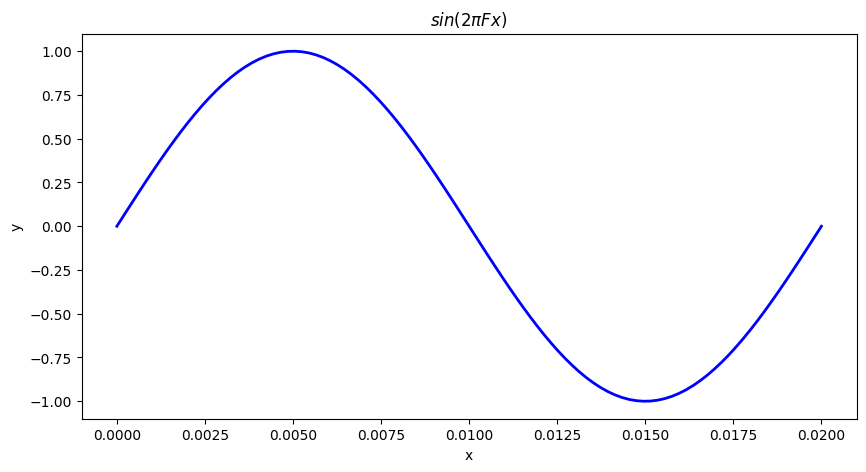

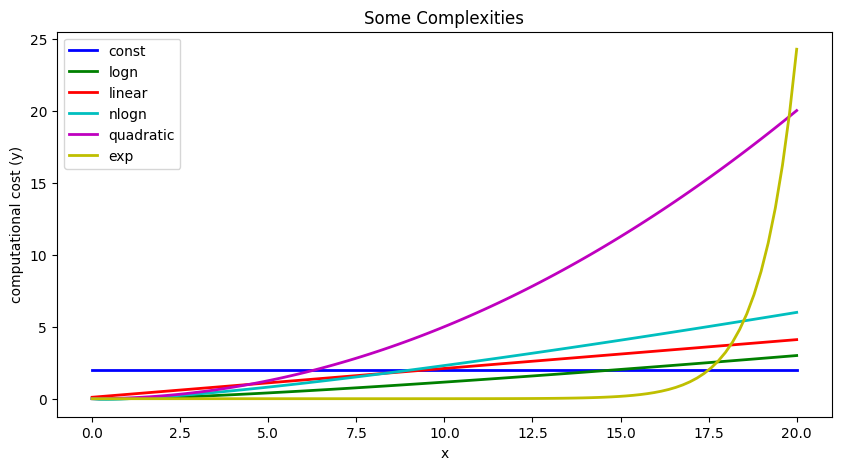

In [ ]:
# Python code for drawing
import numpy as np
import matplotlib.pyplot as plt

# Load from the file generated by C++
data = np.load("sin.npy")

# Plot a sine
plt.figure(figsize=(10, 5))
plt.plot(data[:,0], data[:,1], linewidth=2, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$sin(2\pi Fx)$')
plt.show()


# Load from the file generated by C++
data = np.load("complexity.npy")
x, y_const, y_logn, y_linear, y_nlogn, y_quadratic, y_exp = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4], data[:,5], data[:,6]
data_list = [y_const, (5*10**-2)*y_logn, (10**-1)*y_linear, (10**-1)*y_nlogn, (5*10**-2)*y_quadratic, (5*10**-8)*y_exp]

# Plot a sine
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'purple']
labels = ['const', 'logn', 'linear', 'nlogn', 'quadratic', 'exp']
plt.figure(figsize=(10, 5))
for idx, y in enumerate(data_list):
  plt.plot(x, y, linewidth=2, color=colors[idx], label=labels[idx])

plt.xlabel('x')
plt.ylabel('computational cost (y)')
plt.legend()
plt.title('Some Complexities')
plt.show()
